In [1]:
pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import wquantiles
from statsmodels import robust

In [4]:
state = pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\csv\\Machine Learning\\state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
state["Population"].mean()

6162876.3

In [6]:
trim_mean(state["Population"],0.1)

4783697.125

In [7]:
np.average(state["Murder.Rate"],weights = state["Population"])

4.445833981123393

In [8]:
np.average(state["Population"],weights = state["Murder.Rate"])

6738594.411214954

In [9]:
# 

Text(0.5, 0, 'Population (Millions)')

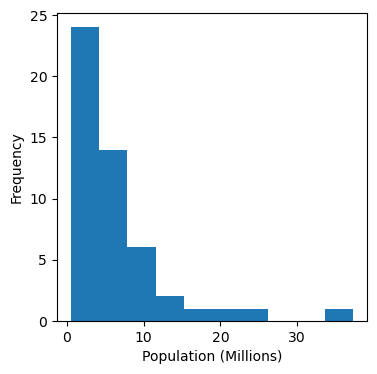

In [10]:
ax = (state["Population"] / 1000000).plot.hist(figsize=(4,4))       # Right Tailed Skewed
ax.set_xlabel("Population (Millions)")

Text(0.5, 0, 'Murder Rate (per 100,000)')

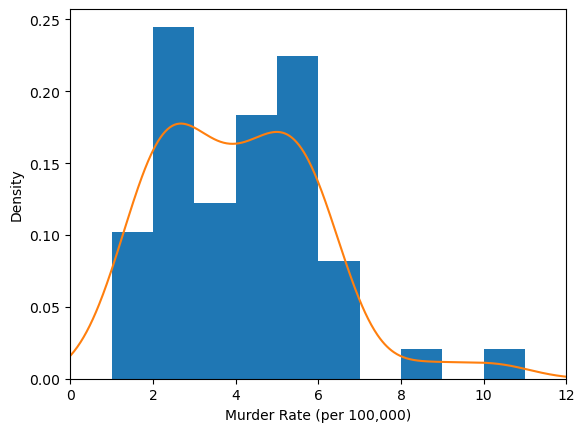

In [11]:
ax = state["Murder.Rate"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
state["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder Rate (per 100,000)")

In [13]:
dfw = pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\csv\\Machine Learning\\dfw_airline.csv")
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

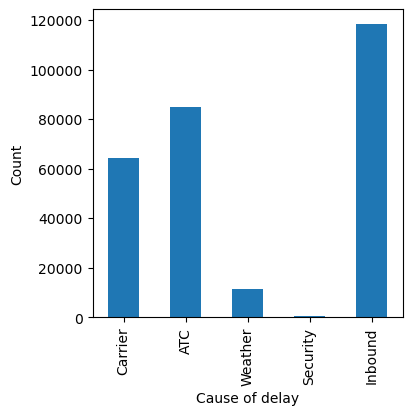

In [14]:
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

# Correlation

In [16]:
sp500_sym = pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\csv\\Machine Learning\\sp500_sectors.csv")
sp500_px = pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\csv\\Machine Learning\\sp500_data.csv.gz",index_col=0)

In [17]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [18]:
sp500_sym.tail()

,sector,sector_label,sub_sector,symbol
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX
516,health_care,Health Care,health_care_distributors,HSIC


In [19]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [27]:
sp500_sym.sector.unique()

array(['information_technology', 'industrials', 'energy',
       'consumer_discretionary', 'utilities', 'materials', 'etf',
       'telecommunications_services', 'consumer_staples', 'financials',
       'health_care'], dtype=object)

In [28]:
etf

NameError: name 'etf' is not defined

In [29]:
etfs.corr()

NameError: name 'etfs' is not defined

<Axes: >

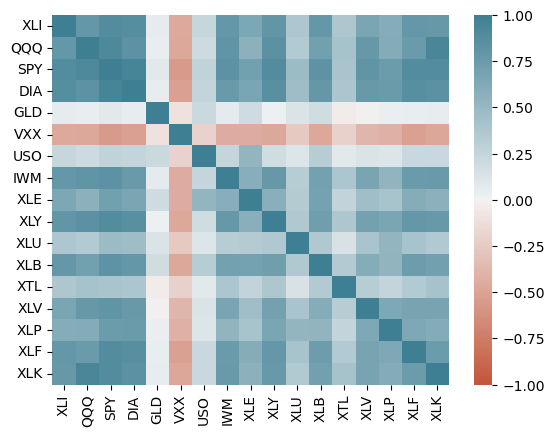

In [30]:
etfs = sp500_px.loc[sp500_px.index > "2012-07-01",
                    sp500_sym[sp500_sym["sector"] == "etf"]["symbol"]]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
 cmap=sns.diverging_palette(20,220,as_cmap=True))

In [31]:
telecomSymbols = sp500_sym[sp500_sym["sector"] == "telecommunications_services"]["symbol"]
telecom = sp500_px.loc[sp500_px.index >= "2012-07-01" , telecomSymbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


# Scatterplot

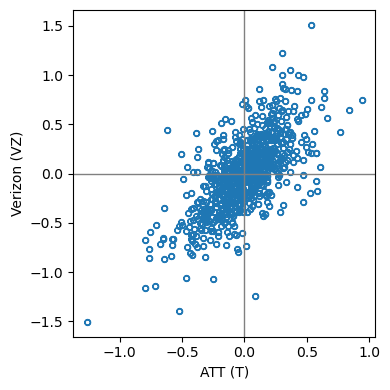

In [32]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

# Exploring two Variables

In [ ]:
kc_tax = pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\Machine Learning\\kc_tax.csv.gz")
kc_tax.head()

In [ ]:
kc_tax.shape

In [ ]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
 (kc_tax.SqFtTotLiving > 100) &
 (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

In [ ]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
 gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [ ]:
plt.scatter(kc_tax0.SqFtTotLiving,kc_tax0.TaxAssessedValue,marker="*")

In [ ]:
fig,ax = plt.subplots(figsize=(4,4))
sns.kdeplot(data=kc_tax0.sample(10000),x="SqFtTotLiving",y="TaxAssessedValue",ax=ax)
ax.set_xlabel("Finished Square feet")
ax.set_ylabel("Tax assesed value")

plt.tight_layout()
plt.show()

In [ ]:
lc_loans = pd.read_csv("C:\\Users\\himan\\OneDrive\\Desktop\\Machine Learning\\lc_loans.csv")
lc_loans

In [ ]:
lc_loans.unstack()

In [ ]:
dir(pd)